# Hypotesis 21

### H21: The order's itens quantity is directly proportional to the full order value (price + freight)

In [64]:
from pyspark.sql import SparkSession, functions as F, types as T
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
spark = SparkSession.builder.getOrCreate()

In [66]:
order_items_df = spark.read \
                      .option('quote', '\"') \
                      .option('escape', '\"') \
                      .csv('./dataset/olist_order_items_dataset.csv', header=True, multiLine=True)

order_items_df.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)



In [67]:
order_items_df.limit(5).toPandas()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [68]:
aux_df = order_items_df.select(F.col('order_item_id').alias('itens_qnty').cast(T.IntegerType()),
                               F.col('price'),
                               F.col('freight_value'))

aux_df.limit(5).show()

+----------+------+-------------+
|itens_qnty| price|freight_value|
+----------+------+-------------+
|         1| 58.90|        13.29|
|         1|239.90|        19.93|
|         1|199.00|        17.87|
|         1| 12.99|        12.79|
|         1|199.90|        18.14|
+----------+------+-------------+



In [69]:
myUdf = F.udf(lambda x,y: float(x)+float(y), T.DoubleType())

aux_df = aux_df.withColumn('order_price', F.round(myUdf('price', 'freight_value'), 2))

In [70]:
aux_df.limit(10).show()

+----------+------+-------------+-----------+
|itens_qnty| price|freight_value|order_price|
+----------+------+-------------+-----------+
|         1| 58.90|        13.29|      72.19|
|         1|239.90|        19.93|     259.83|
|         1|199.00|        17.87|     216.87|
|         1| 12.99|        12.79|      25.78|
|         1|199.90|        18.14|     218.04|
|         1| 21.90|        12.69|      34.59|
|         1| 19.90|        11.85|      31.75|
|         1|810.00|        70.75|     880.75|
|         1|145.95|        11.65|      157.6|
|         1| 53.99|        11.40|      65.39|
+----------+------+-------------+-----------+



In [71]:
aux_df.stat.corr('itens_qnty', 'order_price')

-0.060706934942014894

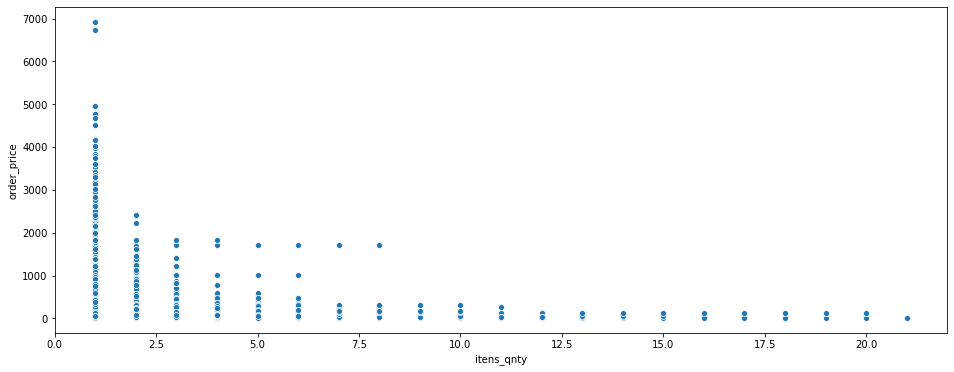

In [72]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='itens_qnty', y='order_price', data=aux_df.toPandas())

# Conclusion

### The hypotesis 21 is invalid, as the full price of the order has no direct correlation with the order itens quantity